<a href="https://colab.research.google.com/github/tankalasaiambica/machine_learning-projects/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

**Step 2: Importing dataset**

In [ ]:
url= "https://drive.google.com/file/d/1fwv5joIqjk5WUhNb7CjAltcEagJ36DJb/view?usp=sharing"
file_id=url.split('/')[-2]
# print(file_id)
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
print("data shape:",df.shape)

data shape: (10, 4)


In [ ]:
print("info of dataset:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes
info of dataset: None


In [ ]:
print("dataset descride:\n",df.describe())

dataset descride:
              Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000


In [ ]:
print("count of null values in dataset:",df.isnull().sum())

count of null values in dataset: Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


**Step 3: Handling the missing data**

In [ ]:
col = ['Age','Salary']
for i in col:
  median = df[i].median()
  df[i].fillna(median,inplace = True)

In [ ]:
print("after filling missing values:",df.isnull().sum())

after filling missing values: Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


In [ ]:
print("printing data after filling missing values:")
print("\n")
df

printing data after filling missing values:




,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 4: Encoding categorical data**

In [ ]:
print("count of datatype in dataset:")
df.dtypes.value_counts()

count of datatype in dataset:


object     2
float64    2
dtype: int64

In [ ]:
df["Purchased"] = pd.get_dummies(df["Purchased"])
# df['Purchased'][df['Purchased']=="Yes"]=1
# df['Purchased'][df['Purchased']=="No"]=0

In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,1
1,Spain,27.0,48000.0,0
2,Germany,30.0,54000.0,1
3,Spain,38.0,61000.0,1
4,Germany,40.0,61000.0,0
5,France,35.0,58000.0,0
6,Spain,38.0,52000.0,1
7,France,48.0,79000.0,0
8,Germany,50.0,83000.0,1
9,France,37.0,67000.0,0


**Step 5: Creating a dummy variable**

In [ ]:
df2 = df

In [ ]:
label_encoder = LabelEncoder()
# Encode labels in column 'Country'. 
df2['Country']= label_encoder.fit_transform(df2['Country']) 
df2

,Country,Age,Salary,Purchased
0,0,44.0,72000.0,1
1,2,27.0,48000.0,0
2,1,30.0,54000.0,1
3,2,38.0,61000.0,1
4,1,40.0,61000.0,0
5,0,35.0,58000.0,0
6,2,38.0,52000.0,1
7,0,48.0,79000.0,0
8,1,50.0,83000.0,1
9,0,37.0,67000.0,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [ ]:
x = df2.drop("Purchased",axis =1)
y = df2['Purchased']

In [ ]:
x.shape , y.shape

((10, 3), (10,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
X_train

,Country,Age,Salary
6,2,38.0,52000.0
4,1,40.0,61000.0
8,1,50.0,83000.0
5,0,35.0,58000.0
2,1,30.0,54000.0
7,0,48.0,79000.0
1,2,27.0,48000.0
0,0,44.0,72000.0


In [ ]:
X_test

,Country,Age,Salary
9,0,37.0,67000.0
3,2,38.0,61000.0


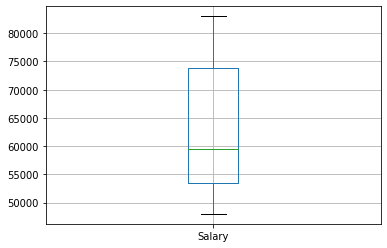

In [ ]:
X_train[['Salary']].plot.box(grid='True')

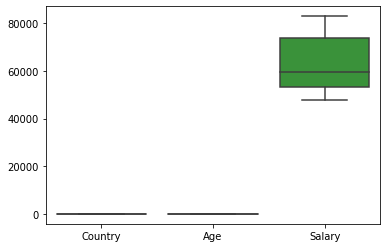

In [ ]:
 sns.boxplot(data = X_train)

**Step 7: Feature Scaling**

In [ ]:
num_cols = ['Salary']
x_m = X_train
x_t = X_test
for i in num_cols:
  # fit scaler on training data
  norm = MinMaxScaler().fit(x_m[[i]])

  # transform training data
  x_m[i] = norm.transform(x_m[[i]])

  # transform testing dataabs
  x_t[i] = norm.transform(x_t[[i]])

In [ ]:
x_m

,Country,Age,Salary
6,2,38.0,0.114286
4,1,40.0,0.371429
8,1,50.0,1.000000
5,0,35.0,0.285714
2,1,30.0,0.171429
7,0,48.0,0.885714
1,2,27.0,0.000000
0,0,44.0,0.685714


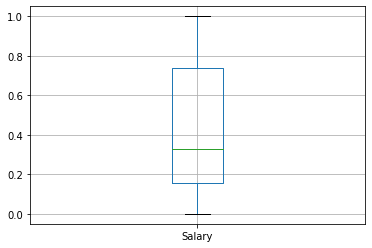

In [ ]:
x_m[['Salary']].plot.box(grid='True')

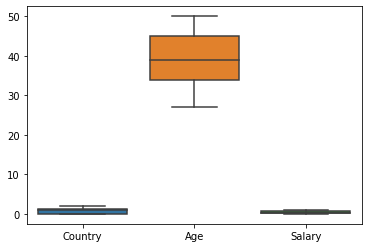

In [ ]:
sns.boxplot(data = x_m)

In [ ]:
num_cols = ['Salary']
x_s = X_train
x_st = X_test

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_s[[i]])
    
    # transform the training data column
    x_s[i] = scale.transform(x_s[[i]])
    
    # transform the testing data column
    x_st[i] = scale.transform(x_st[[i]])

In [ ]:
x_s

,Country,Age,Salary
6,2,38.0,-0.931925
4,1,40.0,-0.194578
8,1,50.0,1.607827
5,0,35.0,-0.440360
2,1,30.0,-0.768070
7,0,48.0,1.280117
1,2,27.0,-1.259635
0,0,44.0,0.706625


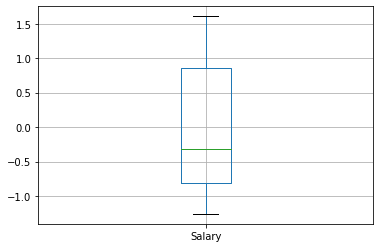

In [ ]:
x_s[['Salary']].plot.box(grid='True')

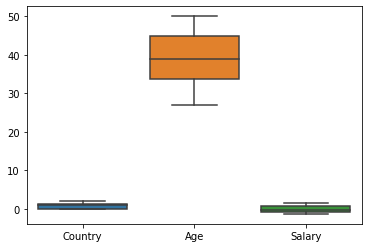

In [ ]:
sns.boxplot(data=x_s)